In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
# 读取四张表的数据
#读取了订单和产品id的关联，csv比较大
prior = pd.read_csv("../python_ml/data/instacart/order_products__prior.csv")

In [3]:
#产品id，与过道的对应
products = pd.read_csv("../python_ml/data/instacart/products.csv")

In [4]:
#订单id和用户id的对应，csv比较大
orders = pd.read_csv("../python_ml/data/instacart/orders.csv")

In [5]:
#超市的过道，过道放的产品的品类
aisles = pd.read_csv("../python_ml/data/instacart/aisles.csv")

In [6]:
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
_mg = pd.merge(prior, products, on=['product_id', 'product_id'])
_mg = pd.merge(_mg, orders, on=['order_id', 'order_id'])
mt = pd.merge(_mg, aisles, on=['aisle_id', 'aisle_id'])

In [11]:
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,baking ingredients
5,2,17794,6,1,Carrots,83,4,202279,prior,3,5,9,8.0,fresh vegetables
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279,prior,3,5,9,8.0,doughs gelatins bake mixes
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,202279,prior,3,5,9,8.0,spreads
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,202279,prior,3,5,9,8.0,packaged vegetables fruits
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,205970,prior,16,5,17,12.0,yogurt


In [12]:
mt.shape

(32434489, 14)

In [13]:
mt.isnull().sum()/mt.shape[0]

order_id                  0.00000
product_id                0.00000
add_to_cart_order         0.00000
reordered                 0.00000
product_name              0.00000
aisle_id                  0.00000
department_id             0.00000
user_id                   0.00000
eval_set                  0.00000
order_number              0.00000
order_dow                 0.00000
order_hour_of_day         0.00000
days_since_prior_order    0.06407
aisle                     0.00000
dtype: float64

In [14]:
cross = pd.crosstab(mt['user_id'], mt['aisle_id'])

In [15]:
cross.head(10)

aisle_id,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,133,134
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
cross.shape

(206209, 134)

In [17]:
type(cross)

pandas.core.frame.DataFrame

In [18]:
# 降维，保存百分之90以上的方差，如果是整数则是降到整数的特征
# 将每个特征的值标准化成均值为 0，方差为 1
# 计算协方差矩阵
# PCA 本质上是在做坐标系的旋转和压缩，让数据用更少的维度表示尽可能多的信息。它的核心是找到数据中“方差最大”的方向。
pca = PCA(n_components=0.9)

In [19]:
data = pca.fit_transform(cross)
data.shape

(206209, 27)

In [20]:
type(data)

numpy.ndarray

In [21]:
# 把样本数量减少,为了下面画图方便，这里只取500个样本
x = data[:500]
x.shape

(500, 27)

In [22]:
x[0:10]

array([[-2.42156587e+01, -2.42942720e+00, -2.46636975e+00,
         1.45686388e-01,  2.69042476e-01, -1.43293209e+00,
        -2.14067666e+00,  2.73803122e+00, -2.71431623e+00,
        -1.74313529e+00, -1.13632718e+00,  6.73601069e-01,
        -1.65070735e+00,  2.83802486e+00,  5.89384489e+00,
        -7.84312891e+00, -4.84010146e+00, -3.22598697e+00,
        -4.58007571e+00,  7.77403349e-01, -3.69912893e+00,
         1.90721439e+00, -2.99538594e+00, -7.72922878e-01,
         6.86800336e-01,  1.69439402e+00, -2.34323022e+00],
       [ 6.46320806e+00, -3.67511165e+01,  8.38255336e+00,
        -1.50975303e+01, -6.92093785e+00, -9.78375183e-01,
        -6.01156653e+00, -3.78772465e+00, -8.18074883e+00,
        -9.04086141e+00, -5.61352902e+00, -1.11325323e+00,
         2.96702911e+00, -4.73123497e+00, -9.11472283e+00,
        -2.14709471e-01,  1.29694031e+00, -7.37605505e-01,
        -7.37401979e-01,  7.40042249e-01, -9.13382968e-02,
         5.15128465e+00,  4.58481528e+00,  3.23789431e+

In [23]:
x.max()

np.float64(407.18563418249744)

In [24]:
x.min()

np.float64(-144.56766126863653)

In [25]:
km = KMeans(n_clusters=4)

In [41]:
km.fit_transform(x)

array([[ 18.2026987 , 267.27914576,  97.6635478 ],
       [ 50.8220467 , 253.39632043,  79.29608123],
       [ 21.65428005, 252.84719855,  83.94375124],
       ...,
       [ 13.94390406, 252.03108621,  84.91895395],
       [  9.37365068, 260.22475778,  91.03484395],
       [ 12.38687468, 265.8199931 ,  97.2299245 ]], shape=(500, 3))

In [42]:
predict = km.predict(x)

In [43]:
print(predict.shape)
print(predict)

(500,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 2 0 0
 0 0 0 2 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0
 2 0 0 0 2 0 0 0 0 1 2 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0
 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 2 0 0 2 2 0 2 0 0 0 0 0 0 0 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 2 2 0 0 0

In [44]:
print(np.unique(predict))

[0 1 2]


In [30]:
# 显示聚类的结果
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

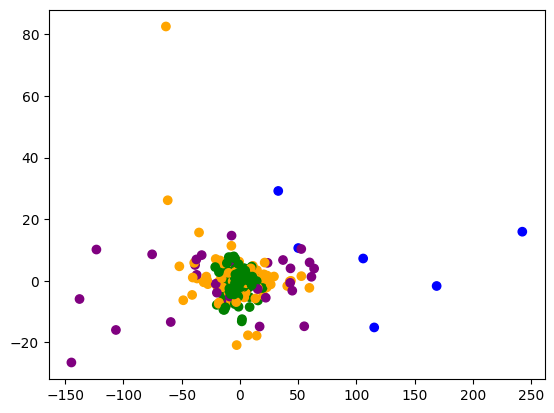

In [33]:
# 建立四个颜色的列表
colored = ['orange', 'green', 'blue', 'purple']
colr = [colored[i] for i in predict] #根据类别给每个样本赋予颜色
#去选择任意两个特征来看聚类的图，可以自行调整,第2个，第20个特征
plt.scatter(x[:, 1], x[:, 19], color=colr)


In [45]:
# 评判聚类效果，轮廓系数，聚类效果很难超过0.7，可以通过这个得分去调整上面KMeans的n_clusters
silhouette_score(x, predict)

np.float64(0.6273140627218255)

In [35]:
#改为2时的结果
km = KMeans(n_clusters=3)
km.fit(x)  #开始训练
predict = km.predict(x)
print(silhouette_score(x, predict))
predict

0.6398520493543287


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
# 通过分类后数据，去看原始样本的特点
cross.iloc[0]

aisle_id
1      0
2      0
3      0
4      0
5      0
      ..
130    0
131    0
132    0
133    0
134    0
Name: 1, Length: 134, dtype: int64

In [38]:
predict[26]

np.int32(1)

In [39]:
cross.iloc[26]

aisle_id
1       0
2       2
3      46
4       0
5       0
       ..
130     0
131     0
132     0
133     0
134     0
Name: 27, Length: 134, dtype: int64

In [40]:
km = KMeans(n_clusters=3)
km.fit(x)
predict = km.predict(x)
silhouette_score(x, predict)

np.float64(0.6662662234611539)